# Example

In [25]:
# import libraries
import gym
import gym_trading
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(0)

In [26]:
# creating environment
env = gym.make('trading-v0', n_samples=350, sampling_every=16, stack_size=10, fee=0.25)

print('Number of actions:', env.action_space.n)

Number of actions: 2


In [27]:
# resetting environment
observation = env.reset()  # the observation is the price of the bitcoin at this timestamp.
print(f'Observation: {observation} (type: {type(observation)})')

Observation: [9142.9  9080.   9083.1  9134.7  9186.1  9103.35 9110.1  9159.9  9133.1
 9113.6 ] (type: <class 'numpy.ndarray'>)


In [28]:
rewards = []
# simulating a trading session
done = False
counter = 0
while not done:

    # random action [BUY, SELL]
    action = np.random.randint(50)  # actions admitted are 0 and 1 only.
    observation, reward, done, _ = env.step(action)
    rewards.append(reward)
    if counter % 1000 == 0:
        print(f'Iteration: {counter} -'
              f'Reward (AAV): {reward} -'
              f'Done: {done} - Price: {observation} (type: {type(observation)})')

    counter += 1

print(f'Total profit: {round(env.get_profit(), 2)} %')

Iteration: 0 -Reward (AAV): 0 -Done: False - Price: [9080.   9083.1  9134.7  9186.1  9103.35 9110.1  9159.9  9133.1  9113.6
 9143.5 ] (type: <class 'numpy.ndarray'>)
Total profit: -16.87 %


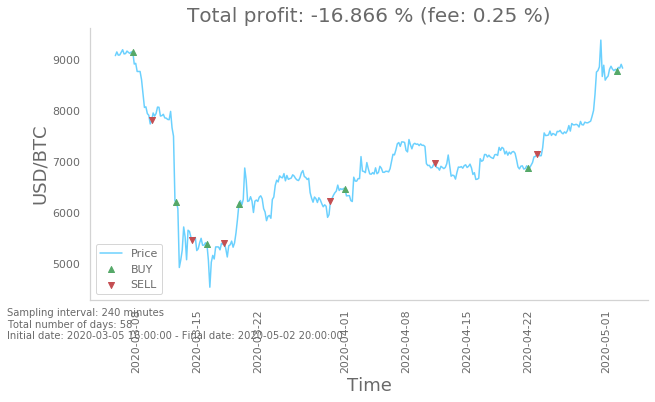

In [29]:
env.render()

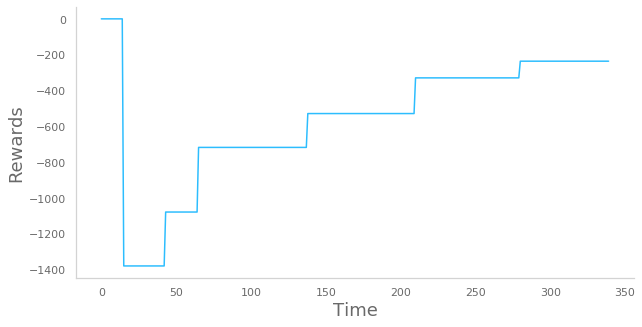

In [30]:
plt.plot(rewards)
plt.xlabel('Time')
plt.ylabel('Rewards')
plt.show()